<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [12]:
boston_url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df= pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [13]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


**<h4><span style = "color:Green">1. For the "Median value of owner-occupied homes" provide a boxplot, explain your findings<h4><span>**

Answer:


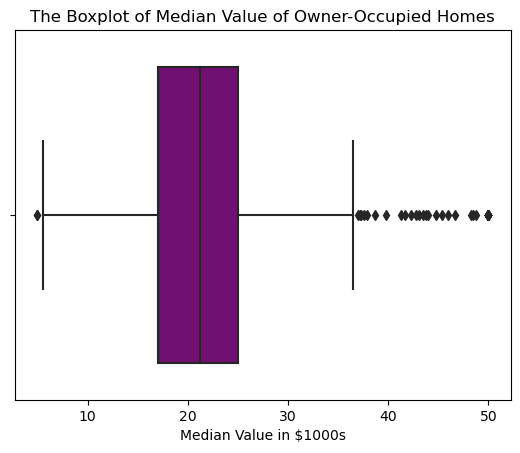

The median value is about $21,200. 
Also, we can see from this graph that more homes are near the $20,000 price point while there are smaller amounts above $36,000.


In [ ]:
print('Answer:')
ax = sns.boxplot(x='MEDV', data = boston_df, color='purple')
pyplot.title('The Boxplot of Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median Value in $1000s')
pyplot.show()
#boston_df['MEDV'].median()

**The median value is about $21,200. Also, we can see from this graph that more homes are near the $20,000 price point while there are smaller amounts above $36,000.**

**<span style = "color:Green"><h4><span style = "color:Green">2. Provide a  bar plot for the Charles river variable, explain your findings<span><h4>**

Answer:


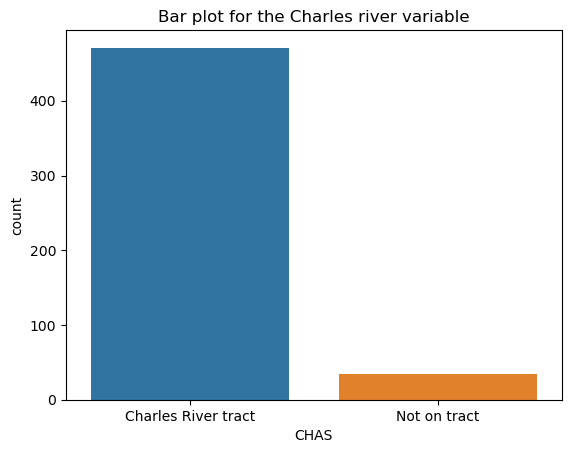

We can see that there are many more counts towards the Charles River tract than not on it
and it is not even close


In [85]:
print('Answer:')

ax = sns.countplot(x='CHAS', data = boston_df)
pyplot.title('Bar plot for the Charles river variable')
ax.set_xticklabels(['Charles River tract', 'Not on tract'])
pyplot.show()

**We can see that there are many more counts towards the Charles River tract than not on it and it is not even close**

**<span style = "color:Green"><h4><span style = "color:Green">3. Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older), explain your findings.<h4>**

In [16]:
#Making the new age groupings:
boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'age_group'] = '70 years and older'

Answer:


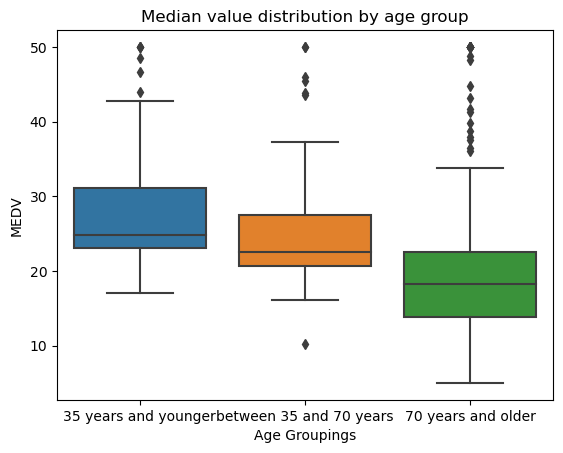

From this graph we can see that as the houses age, the value also decreases over time.


In [17]:
print('Answer:')
ax = sns.boxplot(boston_df, x = 'age_group', y = 'MEDV', order = ['35 years and younger', 'between 35 and 70 years', '70 years and older'])
pyplot.title('Median value distribution by age group')
pyplot.xlabel('Age Groupings')
pyplot.show()

**From this graph we can see that as the houses age, the value also decreases over time.**

**<h4><span style = "color:Green">4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?<span style = "color:Green"><h4>**


Answer:


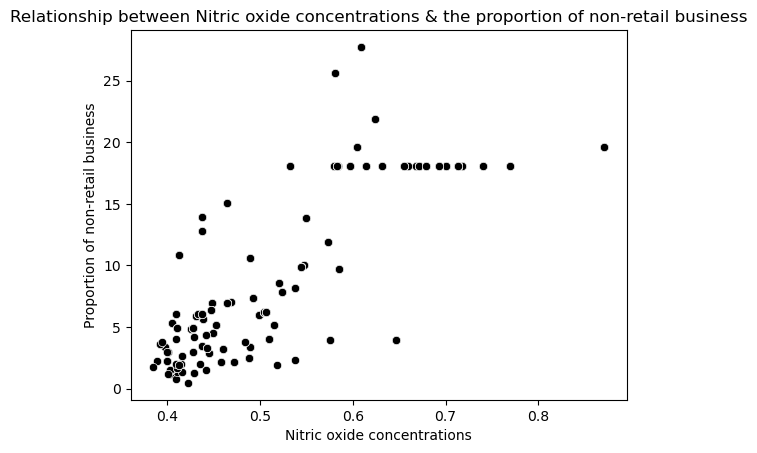

From this graph we can see that more non-retail businesses equates to higher levels of Nitric Oxide Concentrations. 
In short, they have a positive relationship.


In [18]:
print('Answer:')
x = sns.scatterplot(x= 'NOX', y='INDUS',
                     data=boston_df, color='black')
pyplot.title('Relationship between Nitric oxide concentrations & the proportion of non-retail business')
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('Proportion of non-retail business')
pyplot.show()

**From this graph we can see that more non-retail businesses equates to higher levels of Nitric Oxide Concentrations.**
**In short, they have a positive relationship. Although, in the graph we can see the NOX & non-retail business values sort of make a straight line connection around .6 to almost .8.**

**<h4><span style = "color:Green">5. Create a histogram for the pupil to teacher ratio variable, explain your findings<span style = "color:Green"><h4>**

Answer:


/Users/jonathansedaii/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


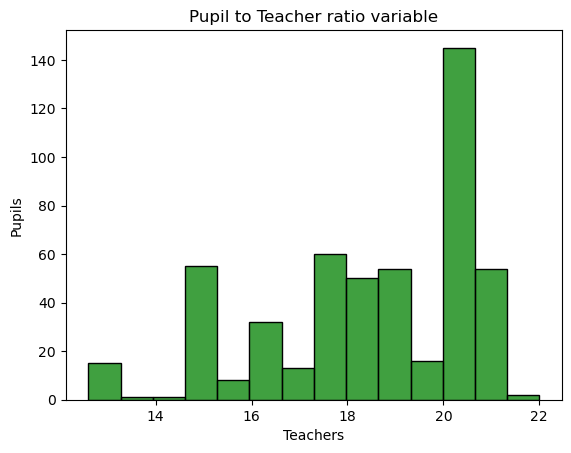

From this result, we can see that when there are around 17 to 19 teachers there is more consistency in pupils,
and this fits the mean value of 18.5. 
Also, around 20 to 21 teachers handles the most pupils at over 140.  


In [86]:
print('Answer:')
ax = sns.histplot(x='PTRATIO', data=boston_df,
                  color='green', )
pyplot.title('Pupil to Teacher ratio variable')
pyplot.xlabel('Teachers')
pyplot.ylabel('Pupils')
pyplot.show()
#boston_df['PTRATIO'].mean()

**From this result, we can see that when there are around 17 to 19 teachers there is more consistency in pupils, and this fits the mean value of 18.5. Also, around 20 to 21 teachers handles the most pupils at over 140.**

**<h4><span style = "color:Green">6. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)<span style = "color:Green"><h4>**

***Stating my hypothesis:***
* $H_0: µ_1 = µ_2$ ("there is not a significant difference in median value of houses bounded by the Charles river or not")
* $H_1: µ_1 ≠ µ_2$ ("there is significant difference in median value of houses bounded by the Charles river or not")


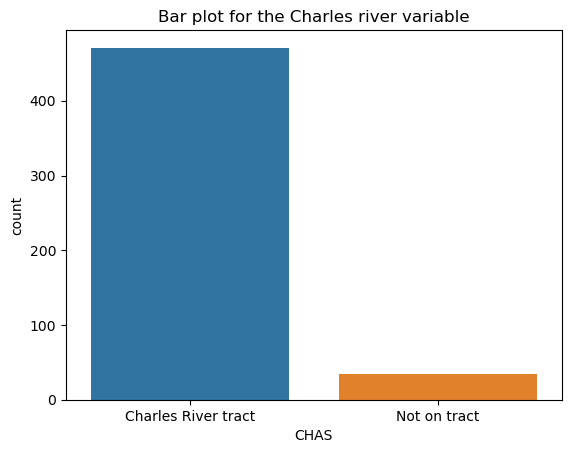

In [40]:
ax = sns.countplot(x='CHAS', data = boston_df)
pyplot.title('Bar plot for the Charles river variable')
ax.set_xticklabels(['Charles River tract', 'Not on tract'])
pyplot.show()

In [20]:
from scipy import stats
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)
print(t_stat, p_value)



3.996437466090509 7.390623170519905e-05


***Since the P-Value(7.4e-05) is less than 0.05, we reject the null hypothesis as there is a signifciant difference between the median value of houses bounded by the Charles river and those that are not. The graph above can help visualize this distinct difference.***

**<h4><span style = "color:Green">7. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)<h4><span style = "color:Green">**


***Stating my hypothesis:***
* $H_0 : µ_1$ = $µ_2$ = $µ_3$ ("there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940")
* $H_1$ : ("there is a difference in at least one of the median values")

In [89]:
###The Data set from earlier:

#boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] = '35 years and younger'
#boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
#boston_df.loc[boston_df['AGE'] >= 70, 'age_group'] = '70 years and older'

In [88]:
scipy.stats.levene (boston_df.loc[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df.loc[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df.loc[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [32]:
ThirtyFive_lower_Median = boston_df.loc[boston_df['age_group'] == '35 years and younger']['MEDV']
ThirtyFive_Seventy_Median = boston_df.loc[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
Seventy_Older_Median = boston_df.loc[boston_df['age_group'] == '70 years and older']['MEDV']

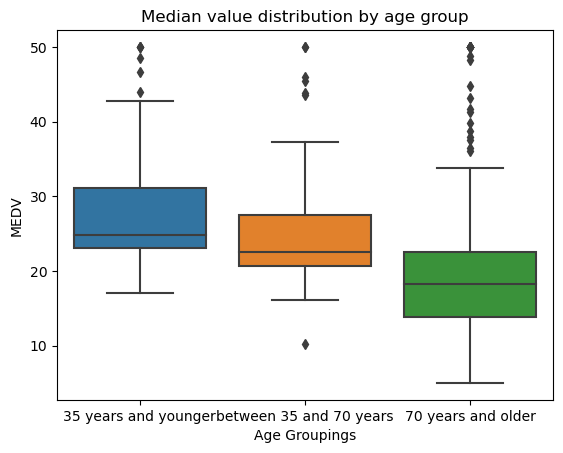

In [39]:
ax = sns.boxplot(boston_df, x = 'age_group', y = 'MEDV', order = ['35 years and younger', 'between 35 and 70 years', '70 years and older'])
pyplot.title('Median value distribution by age group')
pyplot.xlabel('Age Groupings')
pyplot.show()

In [33]:
f_statistic, p_value = scipy.stats.f_oneway(ThirtyFive_lower_Median, ThirtyFive_Seventy_Median, Seventy_Older_Median)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Based on these test results, we reject the null because since the P-Value(1.71e-15) is lower than .05 there is a significant difference in Median values of the Households based on AGE. These results can also be seen from this graph above.**

**<h4><span style = "color:Green">8. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)<h4><span style = "color:Green">**


***Stating my hypothesis:***
* $H_0: µ_1 = µ_2$ ("there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
* $H_1: µ_1 ≠ µ_2$ ("tthere is a relationship between these two variables")

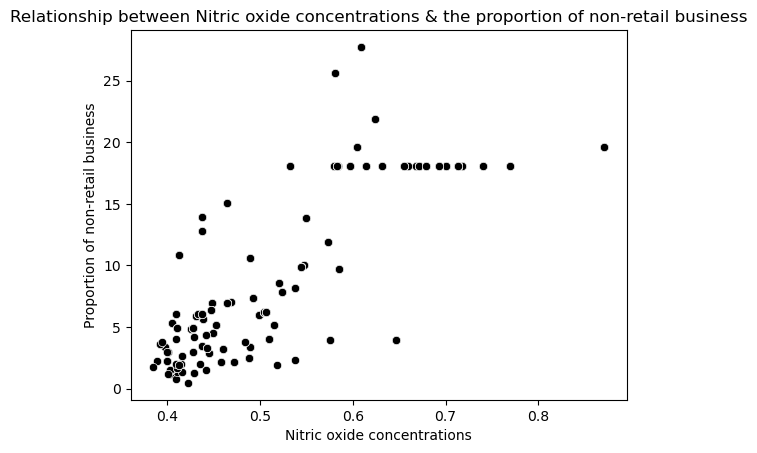

In [37]:
x = sns.scatterplot(x= 'NOX', y='INDUS',
                     data=boston_df, color='black')
pyplot.title('Relationship between Nitric oxide concentrations & the proportion of non-retail business')
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('Proportion of non-retail business')
pyplot.show()

In [38]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

**After the results of the test, we can see that the P-value(7.9e-98) is lower than .05. We reject the null hypothesis as there is a relationship between the Nitic Oxide Levels & the Proportion of non-retail business acres per town. The 0.76 result concludes that there is a strong connection between these 2 variables. Also, in the graph above we can see this visually**

**<h4><span style = "color:Green">9. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)<h4><span style = "color:Green">**

***Stating my hypothesis:***
* $H_0: β1$ = 0 (The distance to the five Boston Employment has no effect on the Median values of owner ocupied homes)
* $H_1: β1$ is not equal to 0 (The weighted distance of the Boston emplyees does have an impact in Median values)

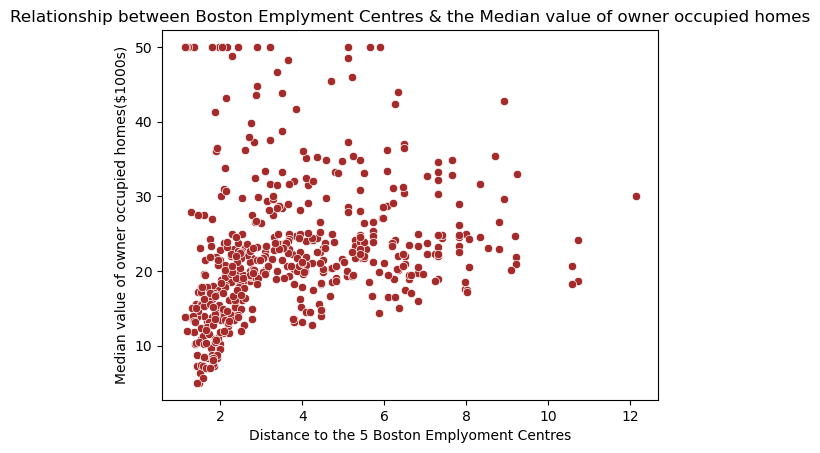

In [94]:
ax = sns.scatterplot(x="DIS", y="MEDV", data=boston_df, color = 'brown')
pyplot.title('Relationship between Boston Emplyment Centres & the Median value of owner occupied homes')
pyplot.xlabel('Distance to the 5 Boston Emplyoment Centres')
pyplot.ylabel('Median value of owner occupied homes($1000s)')
pyplot.show()

In [43]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0)
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.21e-08
Time:                        12:31:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**From the results of the Regression analysis test, we can conclude that the P-Value(1.21e-08) is far less than the .05 threshold. Therefore, we reject the null hypothesis as there is evidence that the distance of the Boston Centres impacts the Median value of the owner occupied houses. There is a small correlation at 0.249 and a coefficient value is 1.0916. So for each unit in weighted distance, the median housing value jumps to $1,091, which isn't a big difference in value, but proves there is a connection nonetheless. We can also see this visual connection in the scatter plot above.**